In [2]:
import pandas as pd
import numpy as np


In [ ]:
!pip install matplotlib

In [12]:
import matplotlib.pyplot as plt


In [ ]:
!pip install seaborn 

In [15]:
import seaborn as sns

In [30]:
pd.options.display.float_format = '{:20,.2f}'.format

# Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

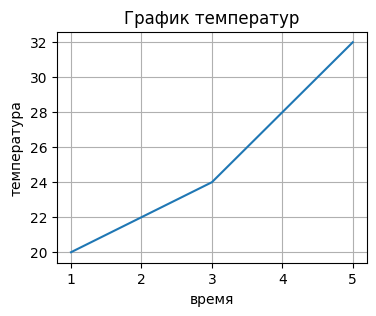

In [17]:
plt.figure(figsize=(4, 3))
plt.plot([1, 2, 3, 4, 5], [20, 22, 24, 28, 32])
plt.xlabel('время')
plt.ylabel('температура')
plt.title('График температур')
plt.grid();

Самая жаркая погода - в 5 часов.

### 1.1. Скачать данные в закрепе к уроку (данные по недвижимости)

In [18]:
df = pd.read_csv('kc_house_data3.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

In [31]:
df.price.describe()

count              21,613.00
mean              540,088.14
std               367,127.20
min                75,000.00
25%               321,950.00
50%               450,000.00
75%               645,000.00
max             7,700,000.00
Name: price, dtype: float64

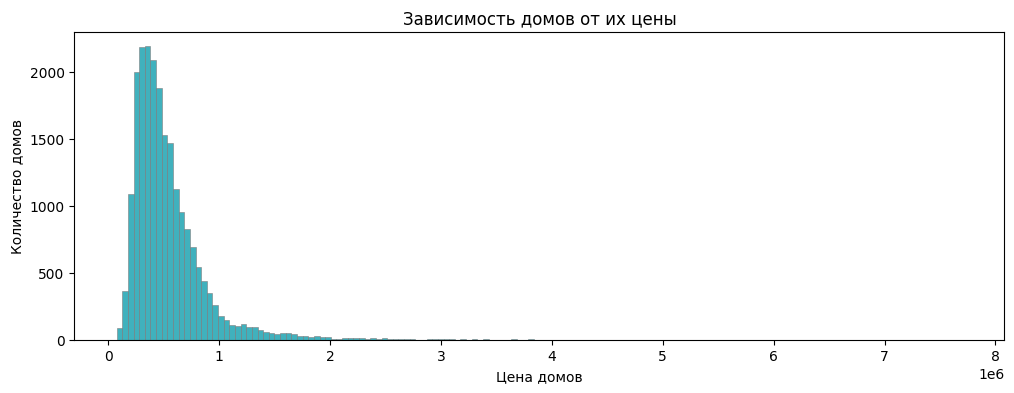

In [22]:
plt.figure(figsize=(12, 4))
sns.histplot(df['price'], bins=150, color='#0097A7', edgecolor ='gray')
plt.xlabel('Цена домов')
plt.ylabel('Количество домов')
plt.title('Зависимость домов от их цены');

Дорогих домов очень мало, больше всего домов стоимостью около 500 тыс.

### 1.3 Изучите распределение квадратуры жилой площади

In [32]:
df.sqft_living.describe()

count              21,613.00
mean                2,079.90
std                   918.44
min                   290.00
25%                 1,427.00
50%                 1,910.00
75%                 2,550.00
max                13,540.00
Name: sqft_living, dtype: float64

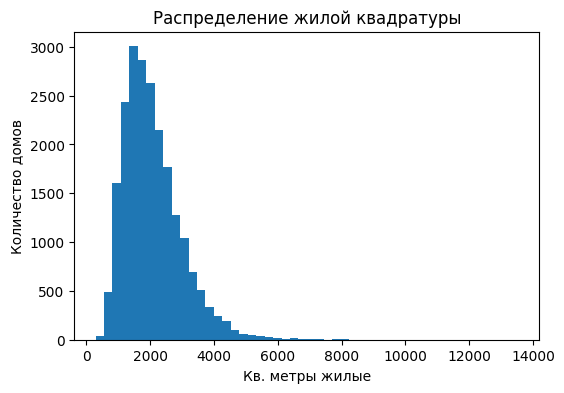

In [28]:
plt.figure(figsize=(6, 4))
plt.hist(df['sqft_living'], bins=50)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Кв. метры жилые')
plt.ylabel('Количество домов');

Средняя площадь жилья - 2000 кв.м.

### 1.4 Изучите распределение года постройки

In [36]:
df.yr_built.describe()

count              21,613.00
mean                1,971.01
std                    29.37
min                 1,900.00
25%                 1,951.00
50%                 1,975.00
75%                 1,997.00
max                 2,015.00
Name: yr_built, dtype: float64

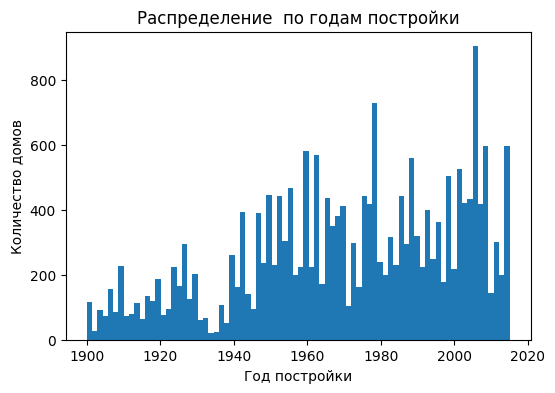

In [37]:
plt.figure(figsize=(6, 4))
plt.hist(df['yr_built'], bins=80)
plt.title('Распределение  по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Со временем количсетво строящихся домов увеличивалось, а в 2015 году был пик по повтройке домов - почти 900 штук.

# Задача 2
### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [38]:
waterfront=df['waterfront'].value_counts()
waterfront.head()

0    21450
1      163
Name: waterfront, dtype: int64

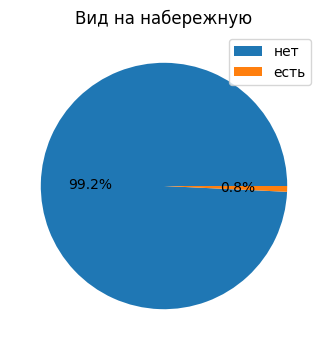

In [39]:
plt.figure(figsize=(10, 4))
plt.pie(waterfront.values, autopct='%1.1f%%')
plt.title('Вид на набережную')
plt.legend(['нет', 'есть']);

Домов с видом на набережную практически нет (менее 1 %)

### 2.2 Изучите распределение этажей домов

In [40]:
df['floors'].value_counts()

1.00    10680
2.00     8241
1.50     1910
3.00      613
2.50      161
3.50        8
Name: floors, dtype: int64

In [45]:
floors_info = df['floors'].value_counts()

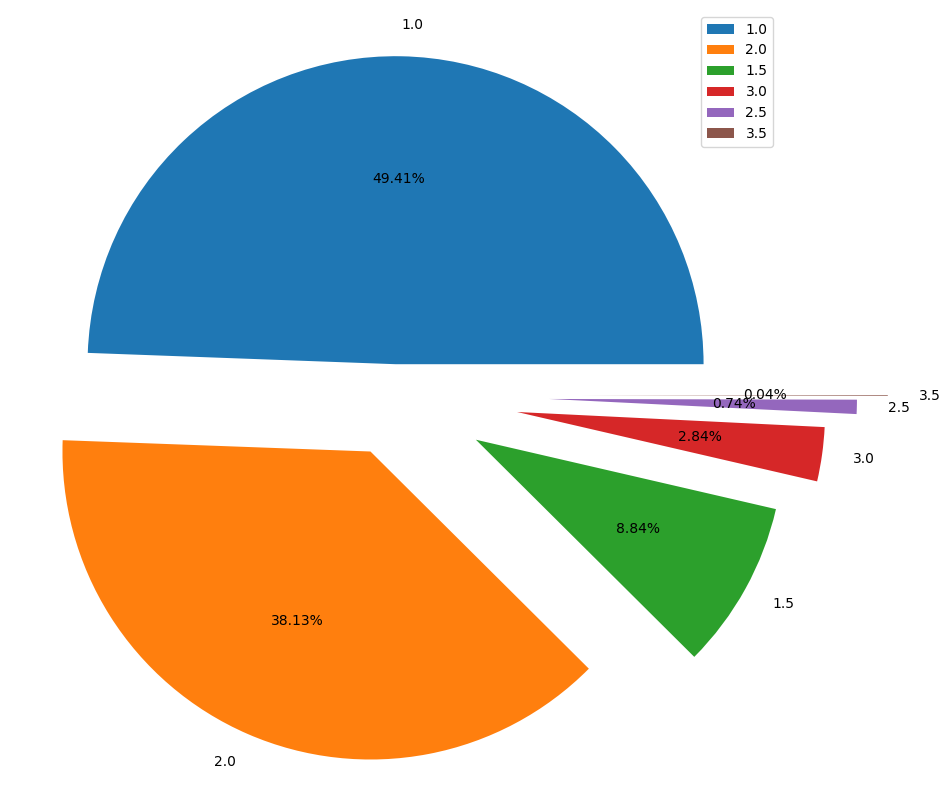

In [47]:
plt.figure(figsize=(10, 10))
explode = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
plt.pie(floors_info, autopct = '%1.2f%%', labels = floors_info.index, explode = explode)
plt.legend(floors_info.index, loc = 'upper right')

Наибольшей популярностью пользуются одноэтажные дома, но и количество двухэтажных домов также велико.

### 2.3 Изучите распределение состояния домов

In [48]:
condition=df['condition'].value_counts()
condition.head()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

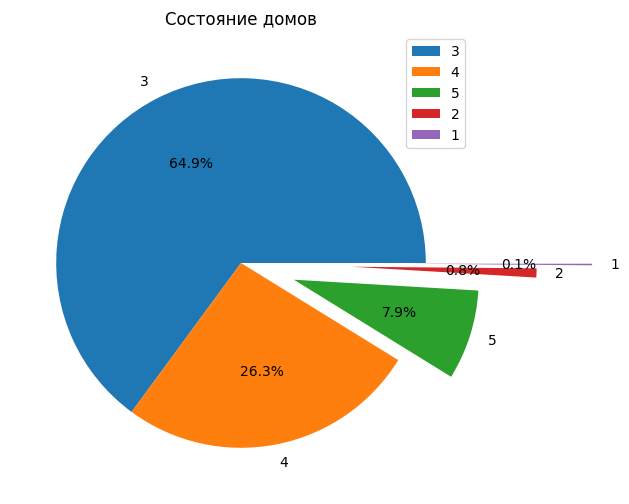

In [49]:
plt.figure(figsize=(6, 6))
expl = [0, 0, 0.3, 0.6, 0.9]
plt.pie(condition.values, autopct='%1.1f%%', labels=condition.index, explode=expl)
plt.title('Состояние домов')
plt.legend(condition.index);

Состояние большинства домов оценивается как удовлетворительное.

# Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

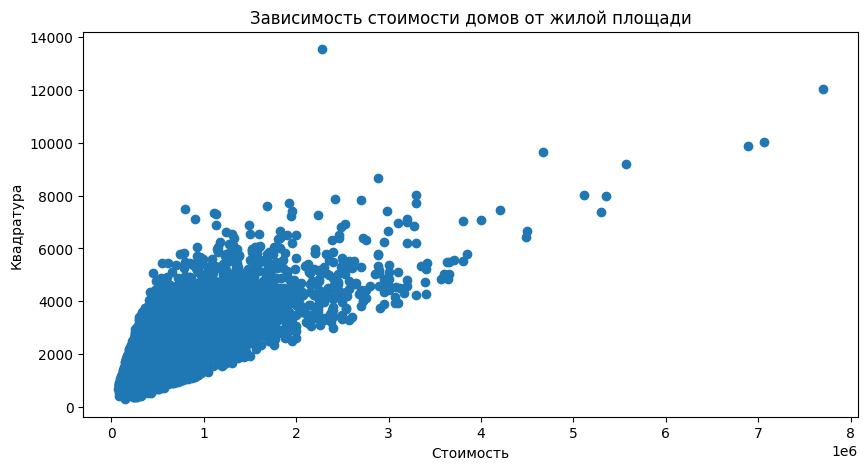

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(df['price'], df['sqft_living'])
plt.title('Зависимость стоимости домов от жилой площади')
plt.xlabel('Стоимость')
plt.ylabel('Квадратура');

Цена домов зависит от жилплощади. Чем больше площадь, тем больше цена.

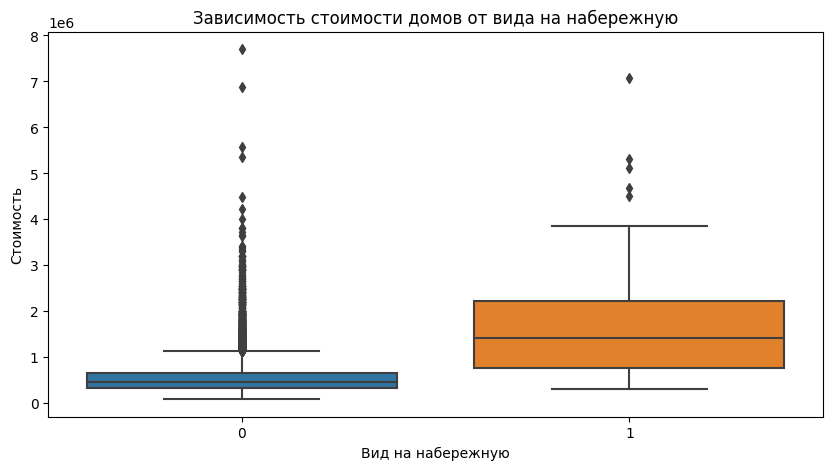

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["waterfront"], y=df["price"])
plt.xlabel("Вид на набережную")
plt.ylabel("Стоимость")
plt.title('Зависимость стоимости домов от вида на набережную');

Дома с видом на набережну дороже, чем без него. Но есть дома и без вида на набережную с высокой ценой. Это связано с квадратурой жилья (график выше).

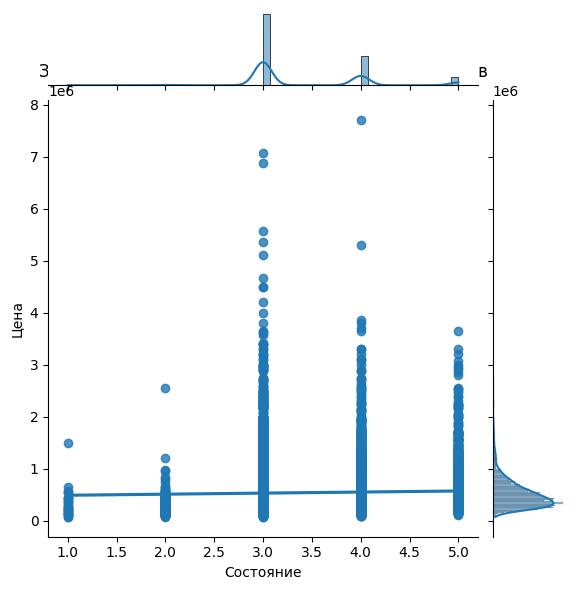

In [81]:
sns.jointplot(x=df['condition'], y=df['price'], kind='reg')
plt.xlabel('Состояние')
plt.ylabel('Цена')
plt.title('Зависимость стоимости домов от состояния домов');

Дома в иделаьном состоянии не очень дорогие (в районе 400 тыс), дома в среднем состоянии - многочисленны и дороги. Самый дорогой дом - в хорошем состоянии.

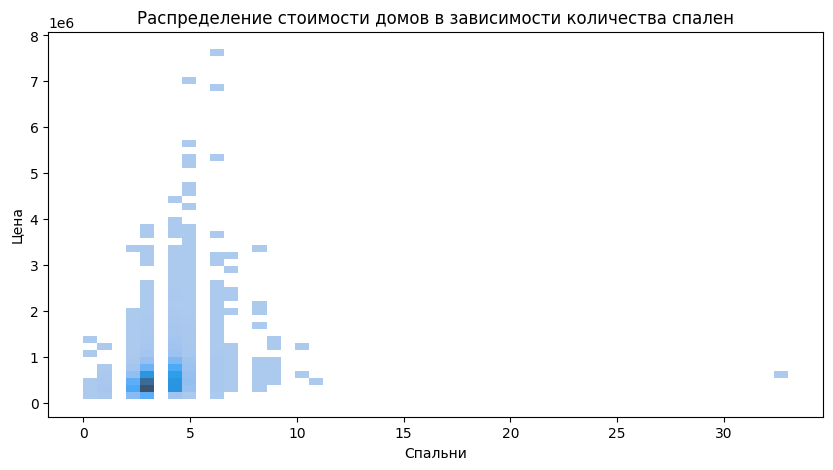

In [69]:
plt.figure(figsize=(10, 5))
sns.histplot(data = df, x = 'bedrooms', y = 'price', bins = 50)
plt.xlabel('Спальни')
plt.ylabel('Цена')
plt.title('Распределение стоимости домов в зависимости количества спален');

Самый дорогой дом (около 800 тыс) имеет 8 спален. В основм цена увеличивается соизмеримо количеству спален, но после 5 спален цена домов идет на спад.

<Figure size 1000x500 with 0 Axes>

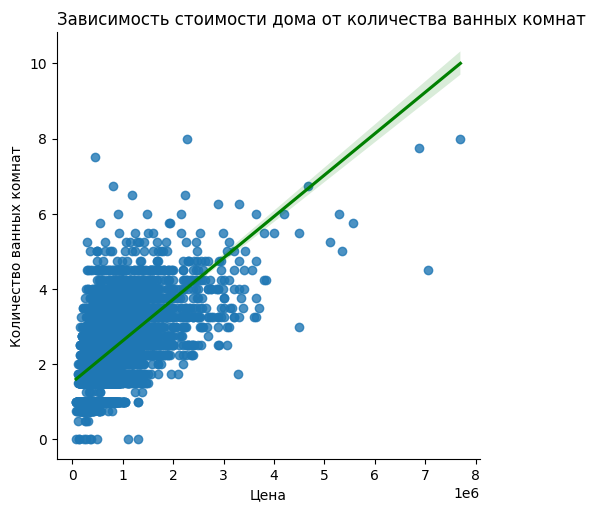

In [80]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=df, x="price", y="bathrooms", line_kws={'color': 'green'})
plt.xlabel('Цена')
plt.ylabel('Количество ванных комнат')
plt.title('Зависимость стоимости дома от количества ванных комнат', loc='left'); 

Большинство домов имеют 5 ванных ванные комнаты и цену чуть более 300 тыс.